## Tutorial document for the basics of the NN code

**Why was this tutorial created?**
1. I found the code for week 4 overwhelming and did not where to start!
2. This tutorial document was born out of an attempt to navigate the code

**What approach will be taken in this tutorial?**
1. This tutorial will: 
    1. First, treat the NN as a "black box" and focus on using it to solve simple data-fitting problems 
    2. Second, we will attempt to "look inside" the "black box" and develop a basic understanding of the underlying processes 
2. This tutorial will focus on developing an intuition for the building blocks of the NN code 
3. This tutorial will also focus on visualizing the data used as well as structure of the NN

**What problems will we solve in this tutorial using NN?**
1. Fitting single-variable output data to single-variable input data 
2. Fitting double-variable output data to the same single-variable input data

**Where will we end this tutorial?** \
I was trying to get Jia's code for ADAM to work but was unable to! So it makes sense that Jia should take over at this point...

In [1]:
# Start by importing all the desired packages

from Layer_basic_simplified import * # Using the * imports everything inside that module
from PINN_basic_simplified import *
import numpy as np
import matplotlib.pyplot as plt
from math import cos, sin, atan

In [2]:
%matplotlib inline
# This line of code helps generate plots right below your code in the Jupyter notebook, hence inline

## Code to visualize a NN!
This code has been taken from https://github.com/miloharper/visualise-neural-network/blob/master/main.py 

Importing this code was leading to errors, hence it has been added below!

We will use it later and the code can be completely ignored!

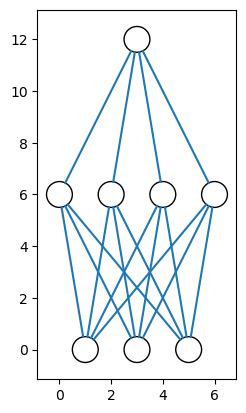

In [3]:
class NeuronVisualized():
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def draw(self):
        circle = plt.Circle((self.x, self.y), radius=neuron_radius, fill=False)
        plt.gca().add_patch(circle)


class LayerVisualized():
    def __init__(self, network, number_of_neurons):
        self.previous_layer = self.__get_previous_layer(network)
        self.y = self.__calculate_layer_y_position()
        self.neurons = self.__intialise_neurons(number_of_neurons)

    def __intialise_neurons(self, number_of_neurons):
        neurons = []
        x = self.__calculate_left_margin_so_layer_is_centered(number_of_neurons)
        for iteration in range(number_of_neurons):
            neuron = NeuronVisualized(x, self.y)
            neurons.append(neuron)
            x += horizontal_distance_between_neurons
        return neurons

    def __calculate_left_margin_so_layer_is_centered(self, number_of_neurons):
        return horizontal_distance_between_neurons * (number_of_neurons_in_widest_layer - number_of_neurons) / 2

    def __calculate_layer_y_position(self):
        if self.previous_layer:
            return self.previous_layer.y + vertical_distance_between_layers
        else:
            return 0

    def __get_previous_layer(self, network):
        if len(network.layers) > 0:
            return network.layers[-1]
        else:
            return None

    def __line_between_two_neurons(self, neuron1, neuron2):
        angle = atan((neuron2.x - neuron1.x) / float(neuron2.y - neuron1.y))
        x_adjustment = neuron_radius * sin(angle)
        y_adjustment = neuron_radius * cos(angle)
        line = plt.Line2D((neuron1.x - x_adjustment, neuron2.x + x_adjustment), (neuron1.y - y_adjustment, neuron2.y + y_adjustment))
        plt.gca().add_line(line)

    def draw(self):
        for neuron in self.neurons:
            neuron.draw()
            if self.previous_layer:
                for previous_layer_neuron in self.previous_layer.neurons:
                    self.__line_between_two_neurons(neuron, previous_layer_neuron)


class NeuralNetworkVisualized():
    def __init__(self):
        self.layers = []

    def add_layer(self, number_of_neurons):
        layer = LayerVisualized(self, number_of_neurons)
        self.layers.append(layer)

    def draw(self):
        for layer in self.layers:
            layer.draw()
        plt.axis('scaled')
        plt.show()

if __name__ == "__main__":
    vertical_distance_between_layers = 6
    horizontal_distance_between_neurons = 2
    neuron_radius = 0.5
    number_of_neurons_in_widest_layer = 4
    network = NeuralNetworkVisualized()
    network.add_layer(3)
    network.add_layer(4)
    network.add_layer(1)
    network.draw()

## Create a NN with 1 input, 1 output and 2 hidden layers having 8 neurons each

## Create an input layer with 1 neuron
Instantiating an object of the class "Input" requires "neurons" as input

We will be considering an input layer of "some number of neurons"

These "some number of neurons" are used as an input argument to the "Input" class

Since we have single-variable data,

These "some number of neurons" = 1

Hence, input argument to the Input class = 1

In [4]:
Li = Input(1)

In [5]:
Li

## What are the properties of the input layer?

In [6]:
# Recall that we can access attributes of the object using .tab
print("The Name of layer is: ", Li.name)
print("The Activation function of this layer is: ", Li.activation)
print("The Python type of this layer is: ", type(Li))

The Name of layer is:  input
The Activation function of this layer is:  None
The Python type of this layer is:  <class 'Layer_basic_simplified.Input'>


## Create the first hidden layer with 8 neurons
The hidden layer is initialized using "Dense" and again, the "number of neurons" in that hidden layer is used as the input

Input argument = 8

In [7]:
Lh_1 = Dense(8)

In [8]:
Lh_1

## What are the properties of the first hidden layer?

In [9]:
print("The Name of layer is: ", Lh_1.name)
print("The Activation function of this layer is: ", Lh_1.activation)
print("The Python type of this layer is: ", type(Lh_1))

The Name of layer is:  hidden
The Activation function of this layer is:  <function tanh at 0x000001E1089C2520>
The Python type of this layer is:  <class 'Layer_basic_simplified.Dense'>


## Create the second hidden layer with 8 neurons
Input argument = 8

In [10]:
Lh_2 = Dense(8)

In [11]:
Lh_2

## What are the properties of the second hidden layer?

In [12]:
print("The Name of layer is: ", Lh_2.name)
print("The Activation function of this layer is: ", Lh_2.activation)
print("The Python type of this layer is: ", type(Lh_2))

The Name of layer is:  hidden
The Activation function of this layer is:  <function tanh at 0x000001E1089C2520>
The Python type of this layer is:  <class 'Layer_basic_simplified.Dense'>


## Create an output layer with 1 neuron
Input argument = 1

In [13]:
Lo = Dense(1)

## What are the properties of the output layer?

In [14]:
print("The Name of layer is: ", Lo.name)
print("The Activation function of this layer is: ", Lo.activation)
print("The Python type of this layer is: ", type(Lo))

The Name of layer is:  hidden
The Activation function of this layer is:  <function tanh at 0x000001E1089C2520>
The Python type of this layer is:  <class 'Layer_basic_simplified.Dense'>


**Note that the output layer is still named "hidden" at this stage and it has "tanh" activation!**

## Create a list of layers
Question: Why create a list of layers?

Answer: Note that initializing an object belonging to the class PINN requires a "list of layers" as one input argument

In [15]:
layers = [Li, Lh_1, Lh_2, Lo]

In [16]:
layers

## What is the Python type of a "list of layers"?

In [17]:
type(layers)

list

Note that the type of the "list of layers" is a list

However, the first element of the list is of type 'Layer_basic.Input'

Additionally, the remaining element of the list is of type 'Layer_basic.Dense'

## Now, it's time to create a NN!
Note that the NN structure here requires the inputs and outputs to be provided during initialization

Let us create some example input and output data, named X and Y respectively!

We will take X to a set of uniformly spaced out real numbers

We will take Y to be equal to the sin(X)

In [18]:
x=np.arange(0,201)*4*np.pi/200 # np.arange creates a sequence of uniformly spaced out points
y = np.sin(x)

# Note on the shape of the input and output!
Typically, a single input is thought of as a row or column vector!

The same goes for the output!

If we have multiple inputs or outputs, we then have a matrix where the "n"th row\col represent the "n"th input/output

Since, our input and output are single-variable, let us check if they are row\col vectors!

In [19]:
x.shape

(201,)

In [20]:
y.shape

(201,)

Our input and output data can be "broadcasted"!

Let us reshape the data so that we don't run into trouble due to broadcasting!

The code for single-variable input/output works well when the inputs are converted to column vectors!

## What does "broadcasting" mean?
The term broadcasting describes how NumPy treats arrays with different shapes during arithmetic operations. Subject to certain constraints, the smaller array is “broadcast” across the larger array so that they have compatible shapes. More information can be found here (https://numpy.org/doc/stable/user/basics.broadcasting.html)

In [21]:
vector_broadcast = np.array([1,2,3])

In [22]:
vector_broadcast

array([1, 2, 3])

In [23]:
vector_broadcast.shape

(3,)

In [24]:
vector_column = np.ones([3,1])

In [25]:
vector_column

array([[1.],
       [1.],
       [1.]])

In [26]:
vector_column.shape

(3, 1)

In [27]:
vector_sum = vector_broadcast + vector_column

In [28]:
vector_sum

array([[2., 3., 4.],
       [2., 3., 4.],
       [2., 3., 4.]])

In [29]:
vector_sum.shape

(3, 3)

## Reshaping the input and output vectors!

In [30]:
x = x.reshape(-1,1)
x.shape

(201, 1)

In [31]:
y = y.reshape(-1,1)
y.shape

(201, 1)

## First, plot the data!

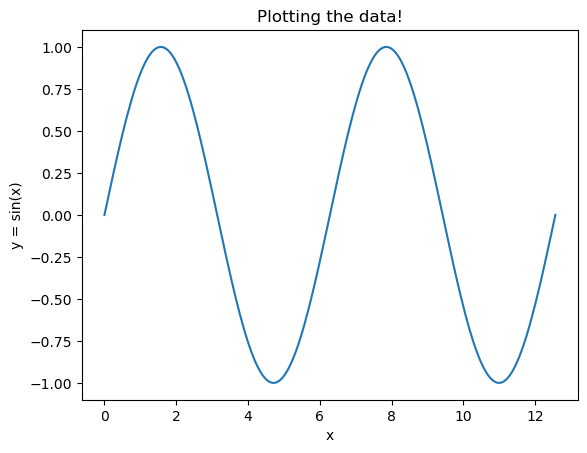

In [32]:
plt.figure()
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y = sin(x)')
plt.title("Plotting the data!")
plt.show()

## Initialize the NN
The NN is initialized simply using the input data = x, output data = y, list of layers = layers

Recall that the list of layers is a list where:

1: First element is of type = Layer_basic.Input

2: Remaining elements are of type = Layer_basic.Dense

In [33]:
P = PINN(x,y,layers)

In [34]:
P

## What is the structure of the NN?

In [35]:
print("The Number of layers = ", len(P.layers))

The Number of layers =  4


In [36]:
print("The layer Index, Name, Activation, Number of Neurons = ")

# The enuemerate statement allows you to loop through a list while simultaneously providing access to the index of a list item
for layer_idx, layer_iter in enumerate(P.layers):
    print(layer_idx+1, layer_iter.name, layer_iter.activation, layer_iter.no)

The layer Index, Name, Activation, Number of Neurons = 
1 input None 1
2 hidden <function tanh at 0x000001E1089C2520> 8
3 hidden <function tanh at 0x000001E1089C2520> 8
4 output <function Identity at 0x000001E1089C1B20> 1


**We see that the name of the final layer is now "output" and it has activation "Identity"**

## Visualizing the NN!

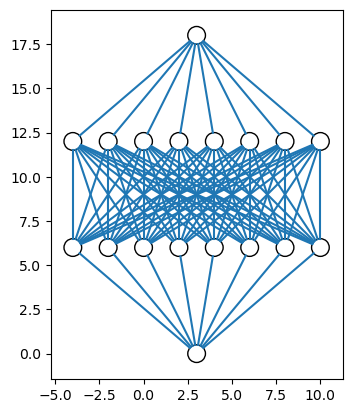

In [37]:
networkVisualized = NeuralNetworkVisualized()

for layer_iter in P.layers:
    networkVisualized.add_layer(layer_iter.no)

networkVisualized.draw()

## Using the NN as a "black box" for "fitting data"
The fit method is simply applied to the object P of class PINN

We will "open" the "black box" shortly...

In [38]:
P.fit(max_iter=100, epoch = 10, tol=1e-4)

 Epoch 1. Elapsed time: 1.26337e-01s. Loss: 5.39111e-02 
 Epoch 2. Elapsed time: 1.07252e-01s. Loss: 6.01683e-05 
 Epoch 3. Elapsed time: 5.67403e-02s. Loss: 2.80405e-05 
 Training completed. Elapsed time: 2.97844e-01s Loss: 2.80405e-05
 Number of iterations in each epoch:  [100. 100.  57.]


## Generate the output / prediction of the NN
The output / prediction is generated by simply passing the input data x as an argument to the object P

We will discuss what's really happening shortly...

In [39]:
y_pred = P(x)

## Plot the results!

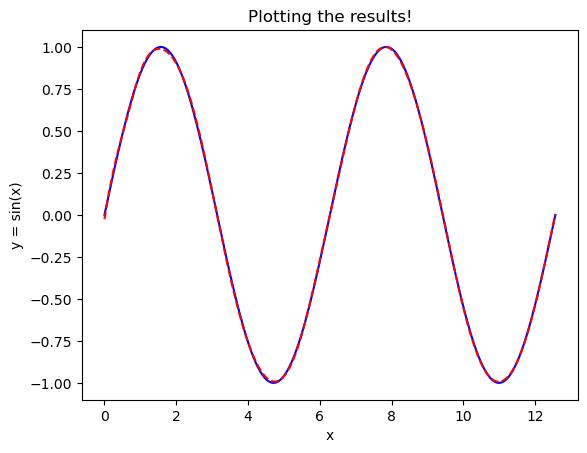

In [40]:
plt.figure()
plt.plot(x,y,'b-')  
plt.plot(x,y_pred,'r--')
plt.xlabel('x')
plt.ylabel('y = sin(x)')
plt.title("Plotting the results!")
plt.show()

## What happens if we have a system with a single input but multiple outputs?
We can tackle this problem by creating a NN with an output layer having 2 neurons

There is no rule to determine the number of hidden layers and how many neurons each of them contain!

Note that in this case, our output will be multi-variable and thus have multiple columns!

Let us first create our new sample data and check that the shapes are consistent!

In [41]:
xm = np.arange(0,2,0.1)
ym = np.asarray([2*xm**2+3*xm -1, 3*xm*np.sin(xm)])

In [42]:
xm.shape

(20,)

In [43]:
ym.shape

(2, 20)

## The input and output need to be reshaped!
The input data is again "broadcastable", we need to convert it into a column vector!

The output data needs to be "transposed"!

In [44]:
xm = xm.reshape(-1,1)
xm.shape

(20, 1)

In [45]:
ym = ym.T
ym.shape

(20, 2)

## Always start by visualizing the data!

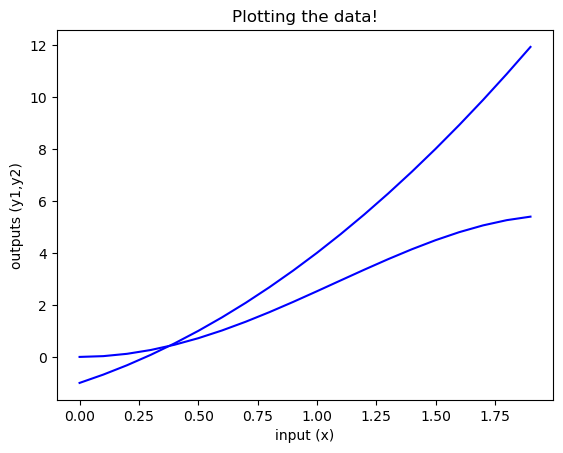

In [46]:
plt.figure()
plt.plot(xm,ym[:,0],'-b')
plt.plot(xm,ym[:,1],'-b')
plt.xlabel('input (x)')
plt.ylabel('outputs (y1,y2)')
plt.title("Plotting the data!")
plt.show()

## Let us now create the layers of our NN!
We will again use an input layer with a single neuron

We will have just one hidden layer with 10 neurons

Our output layer will have 2 neurons!

In [47]:
Li_m = Input(1)
Lh_m = Dense(10)
Lo_m = Dense(2)

## Create the list of layers!

In [48]:
layers_m = [Li_m, Lh_m, Lo_m]

## Create the NN!

In [49]:
Pm = PINN(xm,ym,layers_m)

In [50]:
Pm

## Visualize the NN!

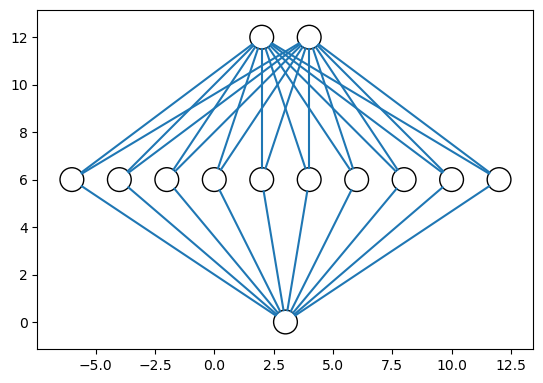

In [51]:
networkVisualized_m = NeuralNetworkVisualized()

for layer_iter_m in Pm.layers:
    networkVisualized_m.add_layer(layer_iter_m.no)

networkVisualized_m.draw()

## Fit the data using the NN!

In [52]:
Pm.fit(max_iter=100, epoch = 10, tol=1e-5)

 Epoch 1. Elapsed time: 6.32319e-02s. Loss: 1.51214e-04 
 Epoch 2. Elapsed time: 5.48599e-02s. Loss: 5.54670e-06 
 Epoch 3. Elapsed time: 3.02553e-03s. Loss: 5.54252e-06 
 Training completed. Elapsed time: 1.22118e-01s Loss: 5.54252e-06
 Number of iterations in each epoch:  [100. 100.   6.]


## What does the "fit" method do?
The following sequence is executed:
1. The "fit" method calls the "train" method


2. The "train" method optimizes iteratively. In each iteration:
    1. Scipy's minimize is called which in turn calls "loss_function"
    
    2. "loss_function" calls the following:
        1. "loss_fun_eval" to do a "forward pass"
        
        2. "back_propagation" to compute the "gradient field" over the network by calling "back_prop_H"
        
        3. "back_prop_H" is based on back-propagation calculus and also calls "DA_to_DH"
        
        4. "DA_to_DH" requires "DA" which is computed during the "forward pass"
        
        5. the __call__ method computes the "forward pass"
    
    
**Note that in "PINN_basic_simplified.py", the functions have been placed in the code, in the order in which they are called** 


This is done for pedagogical, navigation and debugging purposes

# Functions flowchart

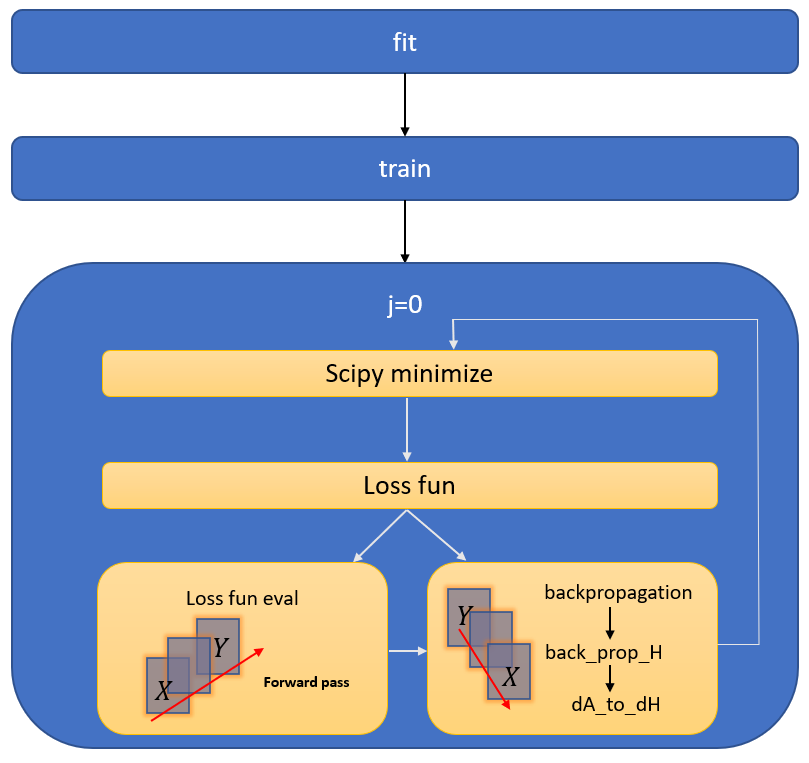

## What does "forward pass" mean?
"Forward pass" refers to starting with the input X,

Multiplying X with the weights of our first layer and adding the corresponding biases,
$$
H_{1} = W_{1}X + b_{1}
$$

Applying the activation function on our "linearly transformed" input,

$$
A_{1} = A(H_{1})
$$

Passing the activation of the first layer as input to the next layer,

Repeating the process...

Until a "Forward Pass" is complete through the NN!

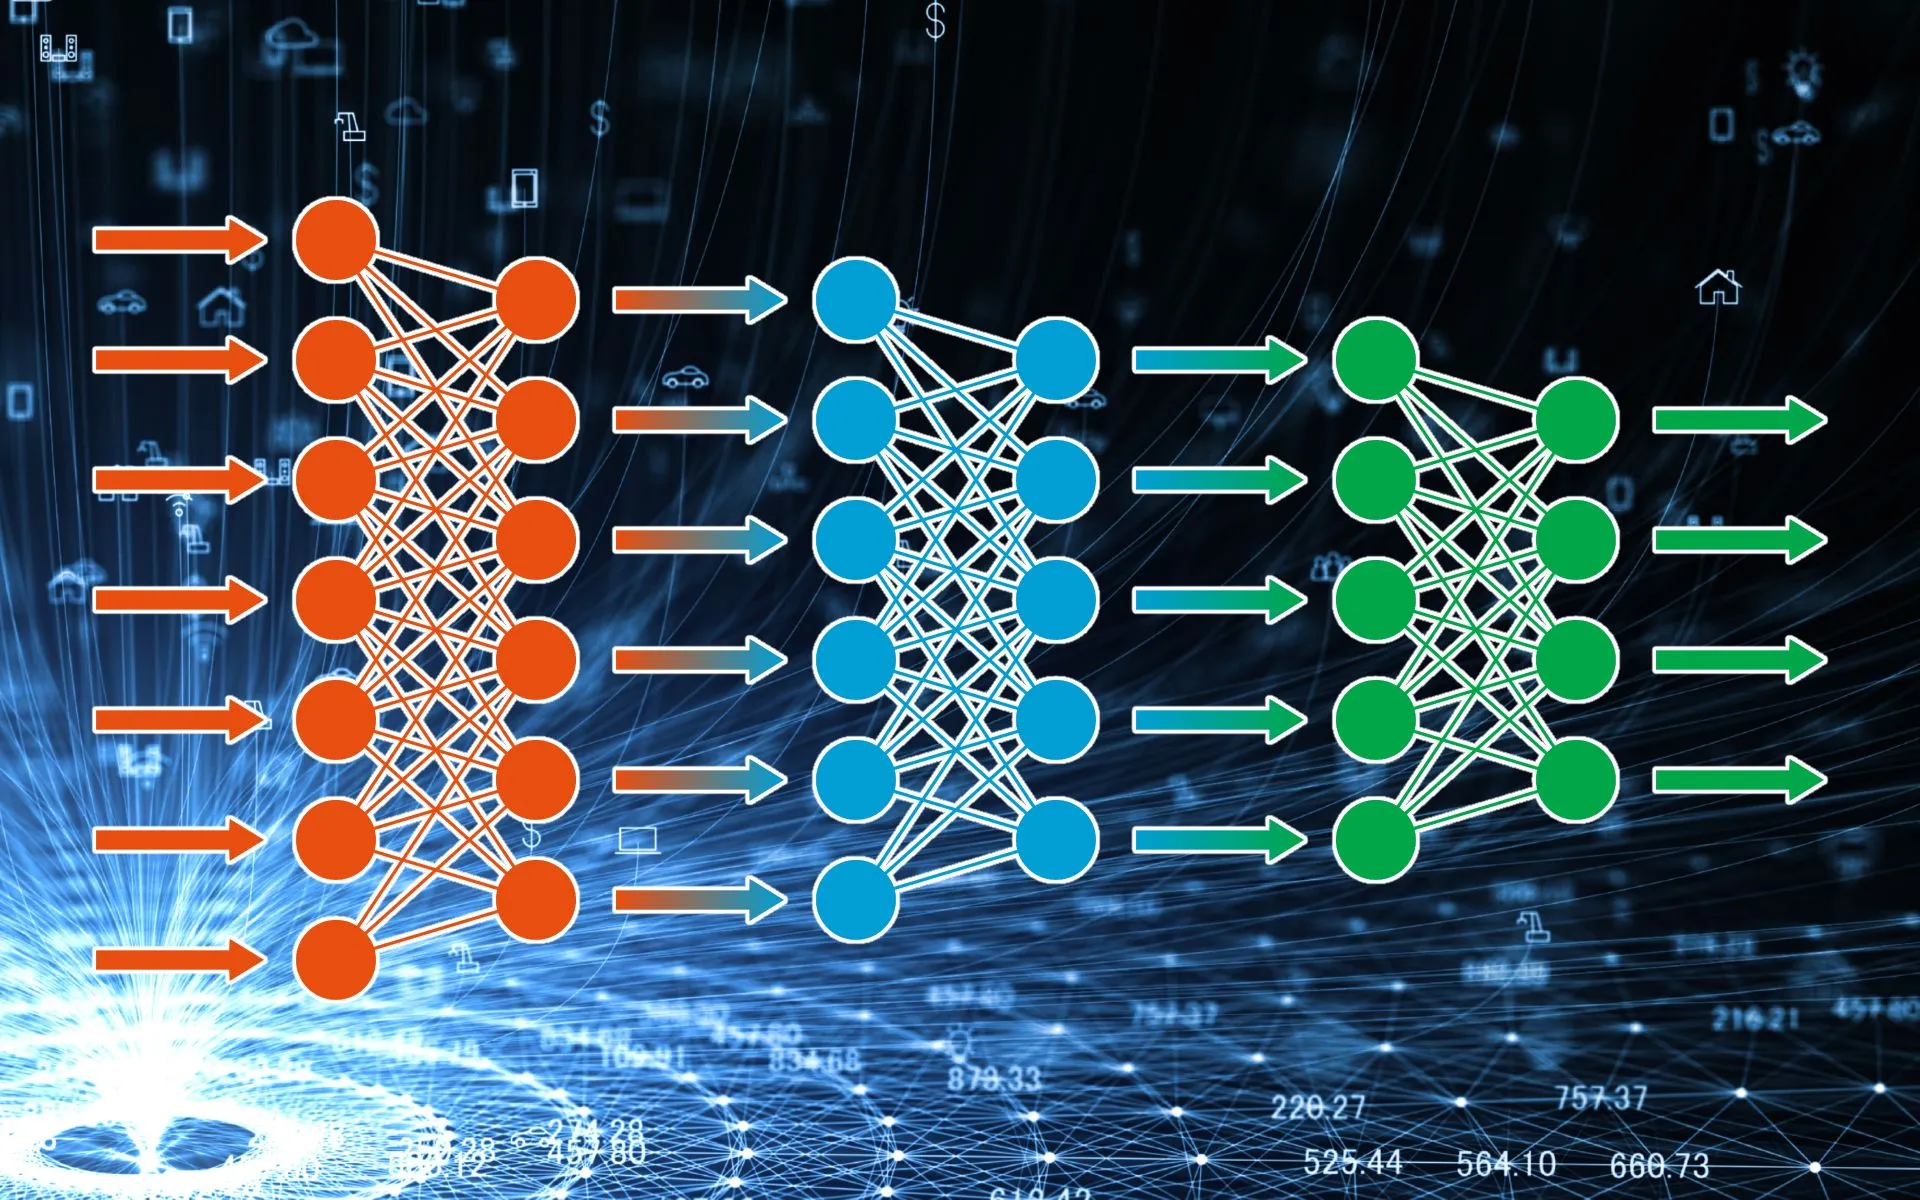

## What does "backpropagation" mean?
Backpropagation can be thought of as sending information about the "error at the output" back to the input

This way, the network parameters (weights and biases) can be updated

We can check if our "updated parameters" are better by doing another "forward pass" with them and seeing if they produce a smaller error

If we get a small enough error, we stop...

Else, we just continue "guessing solutions" with "updated parameters" and "backpropagting errors" until we "guess correctly"!

# What does " __call__" do?
Well, we first create or initialize (instantiate) an object of a class and that calls the __init__ method

Once, our object is created, if we "call" the object, the __call__ method will be "called" with the inputs provided

The __call__ method of the PINN class is designed such that it carries out a "forward pass"

That is why we simply pass our input data = x to our object P to compute the network output with the "correct weights and biases"

## Revisiting the functions flowchart!

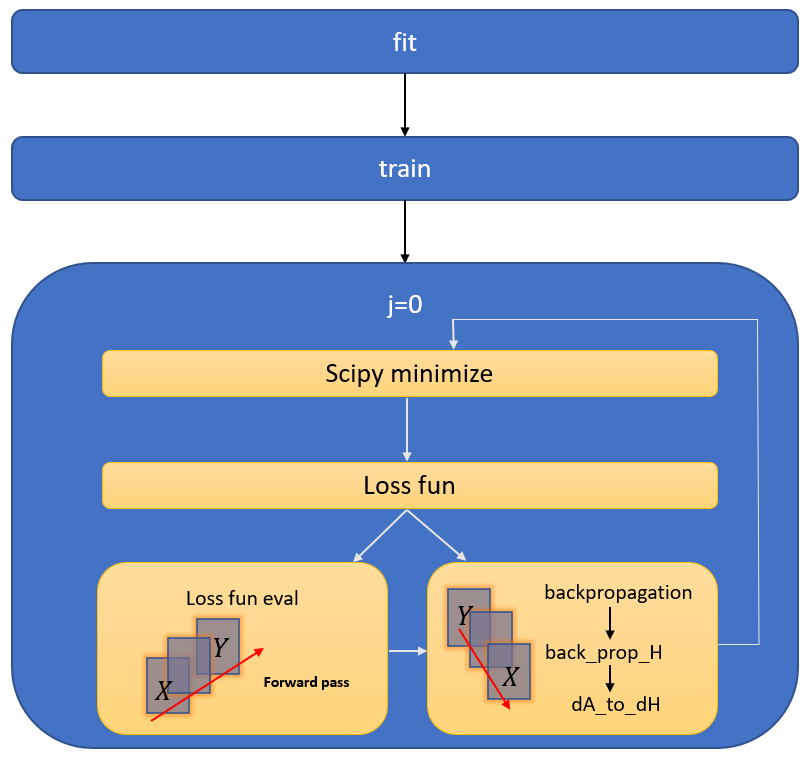

## Generate the output/prediction of the NN
The __call__ function is evoked and it does a "Forward Pass" with the input "xm"

In [53]:
ym_pred = Pm(xm)

## Plot the results!

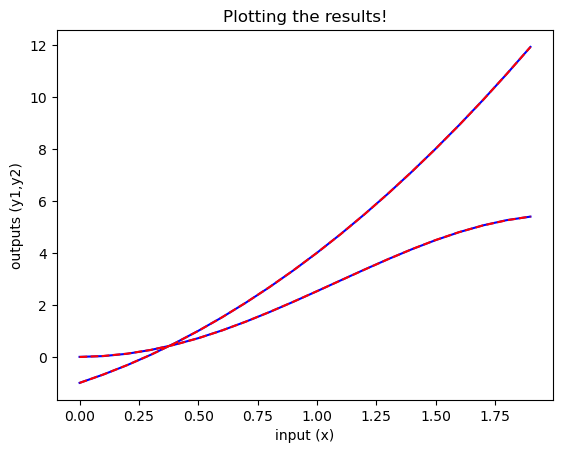

In [54]:
plt.figure()
plt.plot(xm,ym,'b-')  
plt.plot(xm,ym_pred,'r--')
plt.xlabel('input (x)')
plt.ylabel('outputs (y1,y2)')
plt.title("Plotting the results!")
plt.show()